# Подготовка и тщательный анализ данных

In [1]:
# импортируем необходиимые библиотеки

from copy import deepcopy

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# подключим Google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Загрузим с Google drive данные

df_test = pd.read_csv('/content/drive/MyDrive/House prices/test.csv', index_col = 0)
df_train = pd.read_csv('/content/drive/MyDrive/House prices/train.csv', index_col = 0)
df_smpl_sbmsn = pd.read_csv("/content/drive/MyDrive/House prices/sample_submission.csv", index_col = 0)


In [4]:
# Посмотрим список столбцов датасета train

df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [5]:
# посмотрим на количество строк и столбцов в датасете train

df_train.shape

(1460, 80)

In [6]:
# Посмотрим на объекты из датасета train

df_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [7]:
# Посмотрим список столбцов датасета test

df_test.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
# посмотрим на количество строк и столбцов в датасете test. Видим, что нехватает одного столца SalePrice

df_test.shape

(1459, 79)

In [9]:
# Посмотрим на объекты из датасета test

df_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


In [10]:
# Посмотрим на значения столбца SalePrice для датасета test

df_smpl_sbmsn

,SalePrice
Id,
1461,169277.052498
1462,187758.393989
1463,183583.683570
1464,179317.477511
1465,150730.079977
...,...
2915,167081.220949
2916,164788.778231
2917,219222.423400


In [11]:
# добавим в датасет test столбец SalePrice

df_test['SalePrice'] = df_smpl_sbmsn

In [12]:
# соединим train и test в один датасет

df = pd.concat([df_train, df_test])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400


In [13]:
# Посмотрим есть ли полные дубли. Видим, что полных дублей нет

df[df.duplicated()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,


In [14]:
# Теперь уберем столбец SalePrice и посмотим есть ли полные дубли. Нашли два дубля среди признаков объектов.

X = df.drop(columns='SalePrice')
y = df[['SalePrice']]
X[X.duplicated(keep=False)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
194,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
830,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2714,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
2866,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal


In [15]:
# Удалим полные дубли в X, каждый раз оставляя первое из дублирующихся строк (удалим строки с ID 2714 и 2866)

#X.drop_duplicates(inplace = True)

In [16]:
# Проверим, что стало на две строки меньше

#X.shape

In [17]:
# Сразу же удалим эти же строки в y. Острожно, при повторном удалении выдает ошибку, что не найдены строки с таким индеком

#y = y.drop(index=[2714,2866]) 

In [18]:
# Создадим датасет df1, сделав горизонтальное соединение X и y

df1 = pd.concat([X, y], axis = 1)
df1

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.000000
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.000000
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.000000
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.000000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,167081.220949
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,164788.778231
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,219222.423400


In [19]:
# Посмотрим на наибольшее и наименьшее значения таргета

pd.options.display.max_rows = 10
y.sort_values(['SalePrice'])

,SalePrice
Id,
496,34900.0
917,35311.0
969,37900.0
534,39300.0
31,40000.0
...,...
804,582933.0
899,611657.0
1170,625000.0


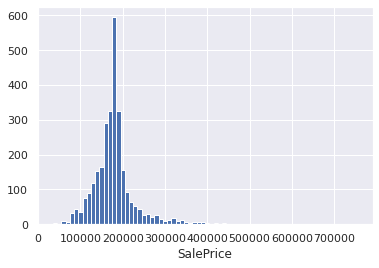

In [20]:
# Посмотрим на гистограмму распределения объектов недвижимости по SalePrice, видим, что 
plt.hist(y,bins = np.arange(min(y.SalePrice),max(y.SalePrice) + 5000, 10000))
plt.xlabel("SalePrice")
plt.show()

In [21]:
# посмотрим сколько всего строк, столбцов, какие типы

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

In [22]:
# посмотрим сколько уникальных значений в каждом столбце

pd.options.display.max_rows = 10
df1.nunique()

MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
Street              2
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice        2101
Length: 80, dtype: int64

In [23]:
# посмотрим на количество пропусков в каждом столбце

pd.options.display.max_rows = 100
df1.isna().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [24]:
# Удалим признаки с большим количеством пропусков: 
# 'Alley' заполненность 197 из 2917, тип аллеи примыкающей к собственности
# 'PoolQC' 10 из 2917, качество бассейна, при этом есть признак PoolArea полностью заполненный
# 'Fence' 571 из 2917, качество забора
# 'MiscFeature' 105 из 2917, другие фичи не описанные в остальных признаках
# 'FireplaceQu', качество камина, при этом есть признак Fireplaces полностью заполненный

# df1.drop(columns = ['Alley', 'PoolQC', 'Fence', 'MiscFeature','FireplaceQu'], inplace = True)
# df1

In [25]:
# Снова разделим признаки от таргета и разобьем на train и тест

X = df1.drop(columns='SalePrice')
y = df1[['SalePrice']]

X_train = X.loc[1:1460]
X_test = X.loc[1461:2919]
y_train = y.loc[1:1460]
y_test = y.loc[1461:2919]

In [26]:
# заменим категориальные признаки на натуральные числа от 1 и выше,
# np.nan d категориальных признаках заменим на 0
# np.nan в чиcловых признаках заменим на медиану признака

# for i in range(len(X.columns)):
#   s=X[X.columns[i]]
#   if s.dtype == "object":
#     dic={list(s.unique())[j-1]:j for j in range(1,len(s.unique())+1)}
#     dic[np.nan] = 0
#     X[X.columns[i]]=s.replace(dic)
#     print(dic)
#   elif s.dtype in ['int64', 'float64']:
#     X[X.columns[i]]=s.replace({np.nan:s.median()})
#     print({np.nan:s.median()})

In [27]:
# %%time

# Изменим категориальные признаки для 'X_train' и 'X_test' по категориям


# Для числовых фич у которых есть NaN, заменим на mean()
category = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath',
            'BsmtHalfBath', 'GarageCars', 'GarageArea']   
X_train[category] = X_train[category].fillna(X_train[category].mean())
X_test[category] = X_test[category].fillna(X_test[category].mean())


# Категориальные без 'NaN', заменим на числовые (из описания)
category = ['ExterQual', 'ExterCond', 'HeatingQC']
X_train[category] = X_train[category].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
X_test[category] = X_test[category].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
#
X_train['CentralAir'] = X_train['CentralAir'].replace({'N':0, 'Y':1})
X_test['CentralAir'] = X_test['CentralAir'].replace({'N':0, 'Y':1})


# Категориальные с 'NaN'(NaN' можно заменить на 0), заменим на числовые (из описания)
category = ['BsmtQual', 'BsmtCond', 'FireplaceQu', 'GarageQual', 'GarageCond']
X_train[category] = X_train[category].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.NaN:0})
X_test[category] = X_test[category].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,np.NaN:0})
# 
category = ['BsmtFinType1', 'BsmtFinType2']
X_train[category] = X_train[category].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.NaN:0})
X_test[category] = X_test[category].replace({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,np.NaN:0})
# 
X_train['PoolQC'] = X_train['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,np.NaN:0})
X_test['PoolQC'] = X_test['PoolQC'].replace({'Ex':4,'Gd':3,'TA':2,'Fa':1,np.NaN:0})


# Категориальные с 'NaN'(заменить на 0 нельзя), заменим на числовые (из описания), NaN заменим средним
X_train['KitchenQual'] = X_train['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
X_train['KitchenQual'] = X_train['KitchenQual'].fillna(X_train['KitchenQual'].mean())
X_test['KitchenQual'] = X_test['KitchenQual'].replace({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1})
X_test['KitchenQual'] = X_test['KitchenQual'].fillna(X_test['KitchenQual'].mean())


# Т.к. нет гаража, то и год постойки гаража - NaN
X_train['GarageYrBlt'] = X_train['GarageYrBlt'].fillna(0)
X_test['GarageYrBlt'] = X_test['GarageYrBlt'].fillna(0)


# # Тест
X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(0)
X_train['LotFrontage'] = X_train['LotFrontage'].fillna(0)
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(0)
X_test['LotFrontage'] = X_test['LotFrontage'].fillna(0)


# Для тех фич, которые мы не можем сделать числовыми (но NaN можно заменить на отдельную категорию),
# заметим 'NaN' на 'NaN/None'
category = ['BsmtExposure', 'GarageType', 'GarageFinish', 'Fence', 'Alley','MasVnrType', 
            'MiscFeature', 'Electrical', 'Functional', 'Utilities', 'Exterior1st', 
            'Exterior2nd','SaleType', 'MSZoning']    
X_train[category] = X_train[category].fillna('NaN/None')
X_test[category] = X_test[category].fillna('NaN/None')


# Сделаем из 'object' -> 'category' для X_train и X_test:
columns_to_category = ['LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 
                       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 
                       'RoofMatl', 'Foundation', 'Heating', 'ExterCond', 'HeatingQC', 
                       'MSSubClass', 'SaleCondition', 'ExterQual', 'Street', 'PavedDrive']


# Суммируем все категориальные фичи
columns_to_category = columns_to_category + category

for j in columns_to_category:
    if X_train[j].dtype != 'category':
        X_train[j] = X_train[j].astype('category')  
    if X_test[j].dtype != 'category':
        X_test[j] = X_test[j].astype('category')  

<ipython-input-27-bab721401330>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[category] = X_train[category].fillna(X_train[category].mean())
<ipython-input-27-bab721401330>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[category] = X_test[category].fillna(X_test[category].mean())
<ipython-input-27-bab721401330>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

# Выбор алгоритма и его гиперпараметров.

Поскольку к нас задача регресии, то будем использовать ансамблевые модели RFR, CBR, LGBR

In [28]:
X_train.shape

(1460, 79)

In [29]:
# Посмотрим на графики зависимости таргета от каждого признака в обучающей выборке

# X_train_plot = deepcopy(X_train)
# X_train_plot["SalePrice"] = y_train

# sns.pairplot(
#     X_train_plot,
#     x_vars=X_train.columns,
#     y_vars=["SalePrice"],
# )

# plt.show()

In [30]:
# Нормализуем данные

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# scaler.fit(X_train)

# X1_train_scaled = scaler.transform(X_train)
# X1_test_scaled = scaler.transform(X_test)

In [31]:
# Установим catboost

!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:
# Импортируем CatBoost и LightGBM
import catboost as cb
import lightgbm as lgb

In [33]:
# Создадим экземпляры классов бустингов-регрессоров (CatBoostRegressorи LGBMRegressor) и обучим их на обучающей части датасета
# Укажем verbose=0, чтобы модели с нами не разговаривали во время обучения:)

CB_model = cb.CatBoostRegressor(verbose=0, cat_features=columns_to_category)
LGB_model = lgb.LGBMRegressor()

CB_model.fit(X_train, y_train)
LGB_model.fit(X_train, y_train)

LGBMRegressor()

In [34]:
# Получим предсказание CB при помощи метода predict на обучающем и тестовом датасете
y_CB_train_predict = CB_model.predict(X_train)
y_CB_test_predict = CB_model.predict(X_test)

In [35]:
# Получим предсказание LGB при помощи метода predict на обучающем и тестовом датасете
y_LGB_train_predict = LGB_model.predict(X_train)
y_LGB_test_predict = LGB_model.predict(X_test)

In [36]:
# Импортируем метрики
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error

In [37]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма CB

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_CB_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_CB_train_predict)}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_train, y_CB_train_predict))}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_CB_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_CB_test_predict)}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_test, y_CB_test_predict))}")

TRAIN
MAX ERROR: 119519.77176902763
MAE:       7252.979549667634
MSE:       10130.903744746554
TEST
MAX ERROR: 330743.2379468086
MAE:       55015.0479551716
MSE:       73420.3226664693


In [38]:
# Посмотрим на наши метрики на обучении и тесте и проанализирем работу алгоритма LGB

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, y_LGB_train_predict)}")
print(f"MAE:       {mean_absolute_error(y_train, y_LGB_train_predict)}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_train, y_LGB_train_predict))}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, y_LGB_test_predict)}")
print(f"MAE:       {mean_absolute_error(y_test, y_LGB_test_predict)}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_test, y_LGB_test_predict))}")

TRAIN
MAX ERROR: 146182.0809152479
MAE:       5481.27476781619
MSE:       10322.278838954348
TEST
MAX ERROR: 355415.1284658727
MAE:       55323.27039372182
MSE:       74584.38208592114


In [39]:
# Импортируем GridSearchCV из модуля model_selection библиотеки sklearn
from sklearn.model_selection import RandomizedSearchCV

In [40]:
# Воспользуем функцией RandomizedSearchCV для LGB
# В качестве определения "лучшей" модели выберем mean_absolute_error

grid_LGBM = RandomizedSearchCV(
            lgb.LGBMRegressor(verbose=0),          # Алгоритм, в котором будем подбирать параметры
            param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 7),
                'lr': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться (Почему "neg_..."?)   
            cv = 4,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=50,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_LGBM.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=LGBMRegressor(verbose=0), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'lr': array([0.001     , 0.0040202 , 0.0070404 , 0.01006061, 0.01308081,
       0.01610101, 0.01912121, 0.02214141, 0.02516162, 0.02818182,
       0.03120202, 0.03422222, 0.03724242, 0.04026263, 0.04328283,
       0.04630303, 0.04932323, 0.05234343, 0.05536364, 0.05838384,
       0.06140404, 0.06442424, 0.0...
       0.22751515, 0.23053535, 0.23355556, 0.23657576, 0.23959596,
       0.24261616, 0.24563636, 0.24865657, 0.25167677, 0.25469697,
       0.25771717, 0.26073737, 0.26375758, 0.26677778, 0.26979798,
       0.27281818, 0.27583838, 0.27885859, 0.28187879, 0.28489899,
       0.28791919, 0.29093939, 0.2939596 , 0.2969798 , 0.3       ]),
                                        'max_depth': range(2, 7)},
                   return_train_score=True, scoring='neg_mean_absolute_error',
                   verbose=5)

In [41]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику LGBM

print(f"Лучшая метрика:   {grid_LGBM.best_score_}")
print(f"Лучшие параметры: {grid_LGBM.best_params_}")

Лучшая метрика:   -15883.986783739534
Лучшие параметры: {'max_depth': 6, 'lr': 0.061404040404040405}


In [42]:
# посмотрим на метрики при лучших параметрах LGBM

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, grid_LGBM.best_estimator_.predict(X_train))}")
print(f"MAE:       {mean_absolute_error(y_train, grid_LGBM.best_estimator_.predict(X_train))}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_train, grid_LGBM.best_estimator_.predict(X_train)))}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, grid_LGBM.best_estimator_.predict(X_test))}")
print(f"MAE:       {mean_absolute_error(y_test, grid_LGBM.best_estimator_.predict(X_test))}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_test, grid_LGBM.best_estimator_.predict(X_test)))}")

TRAIN
MAX ERROR: 142937.3335556863
MAE:       8167.385938996678
MSE:       12890.343552402577
TEST
MAX ERROR: 359818.602735205
MAE:       55612.91754741949
MSE:       75151.17996590305


In [ ]:
%%time

# Воспользуем функцией RandomizedSearchCV для CB
# В качестве определения "лучшей" модели выберем mean_absolute_error

grid_CB = RandomizedSearchCV(
           cb.CatBoostRegressor(verbose=0, cat_features=columns_to_category, random_state=0),          # Алгоритм, в котором будем подбирать параметры
           param_distributions = {                 # Сетка параметров в виде словаря
              'max_depth': range(2, 10),
              'learning_rate': np.linspace(0.001, 0.3, 100),
          },
          scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться (Почему "neg_..."?)   
          cv = 3,                                 # CV для кросс-валидации (число или индексы)
          n_jobs = -1,                            # Число используемых ядер для работы
          return_train_score = True,              # Считать ли метрики на обучающей части
          n_iter=40,                              # Число итераций (сколько будем брать случайных наборов)
          verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
       )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_CB.fit(X_train, y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


In [ ]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику CB

print(f"Лучшая метрика:   {grid_CB.best_score_}")
print(f"Лучшие параметры: {grid_CB.best_params_}")

In [ ]:
# посмотрим на метрики при лучших параметрах CB

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, grid_CB.best_estimator_.predict(X_train))}")
print(f"MAE:       {mean_absolute_error(y_train, grid_CB.best_estimator_.predict(X_train))}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_train, grid_CB.best_estimator_.predict(X_train)))}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, grid_CB.best_estimator_.predict(X_test))}")
print(f"MAE:       {mean_absolute_error(y_test, grid_CB.best_estimator_.predict(X_test))}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_test, grid_CB.best_estimator_.predict(X_test)))}")

In [ ]:
y_test_sol = deepcopy(y_test)
y_test_sol.reset_index(inplace=True)

In [ ]:
#Создадим датафрейм, чтобы выложить наше решение. Score:

y_pred_test = grid_CB.best_estimator_.predict(X_test) 
y_test_sol['SalePrice1']=y_pred_test
solution = y_test_sol.drop(columns=['SalePrice']).rename(columns={'SalePrice1': 'SalePrice'})
solution
solution.to_csv('/content/sample_data/submission_sample_2_1',index=False)

# Отбор важных признаков Permutation Importance

In [ ]:
# Воспользуемся поиском важности перемешиванием, для лучшей модели CatBoost

from sklearn.inspection import permutation_importance

result_CB = permutation_importance(grid_CB.best_estimator_, X_train, y_train,
                                    n_repeats=30,
                                    random_state=0)

In [ ]:
# Посмотрим, что возвращает эта функция

result_CB

In [ ]:
# Оставим только те признаки, которые дают положительный вклад (то есть importances_mean > 0) хотя бы для одной модели

best_feat = X_train.columns[result_CB['importances_mean'] > 0]
best_feat

# Корреляция признаков

In [ ]:
# Сформируем список числовых признаков у которых есть корреляция с другими признаками больше 0.7

list1=list()

for name_col in X_train.columns:
  if (name_col not in columns_to_category):
    if (sum(X_train.corr()[name_col] > 0.7) > 1):
      list1.append(name_col)

list1

In [ ]:
# Выбрем только скорелированные признаки

X_train2 = X_train[list1]

In [ ]:
sns.heatmap(X_train2.corr(), xticklabels=X_train2.columns, yticklabels=X_train2.columns)

In [ ]:
X_train2.corr()

In [ ]:
# соберем все коррелирующие более 0.7 пары в словаре

dicc = {}

for i in X_train2.columns:
  for j in X_train2.columns:
    if (i != j) and (X_train2.corr()[i].loc[j] > 0.7):
      if (i in list1) and (j in list1):
        dicc.update({i:j})
dicc

In [ ]:
# Удалим одинаковые пары

was=list()
dicc1 = dicc.copy()

for i in dicc:
  for j in dicc:
    if i == dicc.get(j) and j == dicc.get(i):
      if i not in was:
        dicc1.pop(j)
        was.append(j)
      
dicc1

In [ ]:
# сформируем словарь важности признаков

sss= sorted(zip(X_train.columns, result_CB['importances_mean']), key=lambda x: abs(x[1]))

dic3={sss[a][0]: sss[a][1] for a in range(len(sss))}

dic3

In [ ]:
# сформируем список наименее важных признаков из каждой коррелирующей пары

del_list=[]

for i in dicc1:
  if dic3.get(i) > dic3.get(dicc1.get(i)):
    del_list.append(dicc1.get(i))
  else:
    del_list.append(i)

del_list

In [ ]:
# удалим эти признаки

X_test1 = X_test.drop(columns=del_list)
X_train1 = X_train.drop(columns=del_list)

# # Удалим их так же из категориальных
columns_to_category1=deepcopy(columns_to_category)

for jj in range(len(columns_to_category1)):
   if columns_to_category1[jj] in del_list:
     columns_to_category.remove(columns_to_category1[jj])

In [ ]:
len(columns_to_category)

In [ ]:
#  Удалим не важные признаки c учетом списка скоррелированных признаков
best_feat1 = list(set(best_feat).difference(set(del_list)))

X_test4 = X_test1[best_feat1]
X_train4 = X_train1[best_feat1]

# # Удалим не важные из категориальных
columns_to_category1=deepcopy(columns_to_category)

for jj in range(len(columns_to_category1)):
   if columns_to_category1[jj] not in best_feat1:
     columns_to_category.remove(columns_to_category1[jj])

# Итоговое обучение модели CB и выгрузка результата

In [ ]:
%%time
# Воспользуем функцией RandomizedSearchCV для CB
# В качестве определения "лучшей" модели выберем mean_absolute_error

grid_CB = RandomizedSearchCV(
            cb.CatBoostRegressor(verbose=0, cat_features=columns_to_category),          # Алгоритм, в котором будем подбирать параметры
             param_distributions = {                 # Сетка параметров в виде словаря
                'max_depth': range(2, 10),
                'learning_rate': np.linspace(0.001, 0.3, 100),
            },
            scoring = 'neg_mean_absolute_error',    # Какие метрики будут считаться (Почему "neg_..."?)   
            cv = 3,                                 # CV для кросс-валидации (число или индексы)
            n_jobs = -1,                            # Число используемых ядер для работы
            return_train_score = True,              # Считать ли метрики на обучающей части
            n_iter=40,                              # Число итераций (сколько будем брать случайных наборов)
            verbose = 5,                            # Чем больше, тем алгоритм разговорчивее
        )

# Обучим сетку на обучающем датасете при помощи метода fit
grid_CB.fit(X_train4, y_train)

In [ ]:
# Выведем набор лучших параметров (они хранятся в best_params_) и лучшую метрику CB

print(f"Лучшая метрика:   {grid_CB.best_score_}")
print(f"Лучшие параметры: {grid_CB.best_params_}")

In [ ]:
# посмотрим на метрики при лучших параметрах CB

print("TRAIN")
print(f"MAX ERROR: {max_error(y_train, grid_CB.best_estimator_.predict(X_train4))}")
print(f"MAE:       {mean_absolute_error(y_train, grid_CB.best_estimator_.predict(X_train4))}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_train, grid_CB.best_estimator_.predict(X_train4)))}")
print("TEST")
print(f"MAX ERROR: {max_error(y_test, grid_CB.best_estimator_.predict(X_test4))}")
print(f"MAE:       {mean_absolute_error(y_test, grid_CB.best_estimator_.predict(X_test4))}")
print(f"MSE:       {np.sqrt(mean_squared_error(y_test, grid_CB.best_estimator_.predict(X_test4)))}")

In [ ]:
y_test_sol = deepcopy(y_test)
y_test_sol.reset_index(inplace=True)

In [ ]:
#Создадим датафрейм, чтобы выложить наше решение. Score: 0.12376

y_pred_test = grid_CB.best_estimator_.predict(X_test4) 
y_test_sol['SalePrice1']=y_pred_test
solution = y_test_sol.drop(columns=['SalePrice']).rename(columns={'SalePrice1': 'SalePrice'})
solution
solution.to_csv('/content/sample_data/submission_sample_2_2',index=False)

# Отчет

In [ ]:
# Установим библиотеку shap
! pip install shap

In [ ]:
import shap

In [ ]:
# Создадим объект библиотеки shap -- explainer при помощи функции TreeExplainer библиотеки shap, который принимает модели классификации и регрессии

explainer_reg = shap.TreeExplainer(grid_CB.best_estimator_)

In [ ]:
# Посчитаем shap-values вызвав у explainer метод shap_values, передав в качестве аргумента датасет X_train4
# для классификации и для регрессии

shap_values_reg = explainer_reg.shap_values(X_train4)

In [ ]:
# Посторим график важности фичей, вызвав summary_plot из библиотеки shap
shap.summary_plot(shap_values_reg, X_train4, max_display=100, plot_size=(10, 20))